<a href="https://colab.research.google.com/github/Seongjin1225/AI_SCHOOL_9/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D/11%EC%9B%94%2007%EC%9D%BC/11%EC%9B%94_7%EC%9D%BC_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 11월 7일 판다스 정리(Groupby)

In [ ]:
import pandas as pd
cereal = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/데이터 분석/cereals.csv')
cereal.head()

,Name,Manufacturer,Type,Calories,Fiber,Sugars
0,100% Bran,Nabisco,Cold,70,10.0,6
1,100% Natural Bran,Quaker Oats,Cold,120,2.0,8
2,All-Bran,Kellogg's,Cold,70,9.0,5
3,All-Bran with Extra Fiber,Kellogg's,Cold,50,14.0,0
4,Almond Delight,Ralston Purina,Cold,110,1.0,8


In [ ]:
# Manufacturer 열의 값을 사용하여 시리얼을 그룹화 해보세요.
data = cereal.groupby('Manufacturer')
print(data)

In [ ]:
# 그룹의 총 개수와 그룹별 시리얼의 개수를 구하세요.
print(cereal.groupby('Manufacturer').Name.value_counts())
print(len(data))

Manufacturer                 Name                             
American Home Food Products  Maypo                                1
General Mills                Apple Cinnamon Cheerios              1
                             Basic 4                              1
                             Cheerios                             1
                             Cinnamon Toast Crunch                1
                                                                 ..
Ralston Purina               Double Chex                          1
                             Muesli Raisins; Dates; & Almonds     1
                             Muesli Raisins; Peaches; & Pecans    1
                             Rice Chex                            1
                             Wheat Chex                           1
Name: Name, Length: 77, dtype: int64
7


In [ ]:
# 제조업체(그룹) 'Nabisco'에 속하는 시리얼을 추출하세요.
cereal[cereal.Manufacturer=='Nabisco']

# 강사님 ver.
data.get_group('Nabisco')

,Name,Manufacturer,Type,Calories,Fiber,Sugars
0,100% Bran,Nabisco,Cold,70,10.0,6
20,Cream of Wheat (Quick),Nabisco,Hot,100,1.0,0
63,Shredded Wheat,Nabisco,Cold,80,3.0,0
64,Shredded Wheat 'n'Bran,Nabisco,Cold,90,4.0,0
65,Shredded Wheat spoon size,Nabisco,Cold,90,3.0,0
68,Strawberry Fruit Wheats,Nabisco,Cold,90,3.0,5


In [ ]:
# 각 제조업체의 Calories, Fiber, Sugars 열 값의 평균을 계산하세요.
cereal.groupby('Manufacturer').agg(['mean'])

# 강사님 ver.
data.mean()

<ipython-input-16-a439c21b8f95>:2: FutureWarning: ['Name', 'Type'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  cereal.groupby('Manufacturer').agg(['mean'])
<ipython-input-16-a439c21b8f95>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.mean()


,Calories,Fiber,Sugars
Manufacturer,,,
American Home Food Products,100.000000,0.000000,3.000000
General Mills,111.363636,1.272727,7.954545
Kellogg's,108.695652,2.739130,7.565217
Nabisco,86.666667,4.000000,1.833333
Post,108.888889,2.777778,8.777778
Quaker Oats,95.000000,1.337500,5.250000
Ralston Purina,115.000000,1.875000,6.125000


In [ ]:
# 각 제조업체의 Sugar 열에서 최대값을 찾으세요.
cereal.groupby('Manufacturer')['Sugars'].max()

# 강사님 ver.
data['Sugars'].max()

Manufacturer
American Home Food Products     3
General Mills                  14
Kellogg's                      15
Nabisco                         6
Post                           15
Quaker Oats                    12
Ralston Purina                 11
Name: Sugars, dtype: int64

In [ ]:
# 각 제조업체의 Fiber 열에서 최소값을 찾으세요.
cereal.groupby('Manufacturer')['Fiber'].min()

# 강사님 ver.
data['Fiber'].min()

Manufacturer
American Home Food Products    0.0
General Mills                  0.0
Kellogg's                      0.0
Nabisco                        1.0
Post                           0.0
Quaker Oats                    0.0
Ralston Purina                 0.0
Name: Fiber, dtype: float64

In [ ]:
# 제조업체별로 설탕함량이 가장 낮은 시리얼을 새로운 Dataframe으로 추출하세요.
cereal.groupby('Manufacturer')['Sugars'].min()

#
def smallest_sugar_row(df):
    return df.nsmallest(1,'Sugars')  # 1 ->> 행의 개수 의미
data.apply(smallest_sugar_row)

,,Name,Manufacturer,Type,Calories,Fiber,Sugars
Manufacturer,,,,,,,
American Home Food Products,43,Maypo,American Home Food Products,Hot,100,0.0,3
General Mills,11,Cheerios,General Mills,Cold,110,2.0,1
Kellogg's,3,All-Bran with Extra Fiber,Kellogg's,Cold,50,14.0,0
Nabisco,20,Cream of Wheat (Quick),Nabisco,Hot,100,1.0,0
Post,33,Grape-Nuts,Post,Cold,110,3.0,3
Quaker Oats,57,Quaker Oatmeal,Quaker Oats,Hot,100,2.7,-1
Ralston Purina,61,Rice Chex,Ralston Purina,Cold,110,0.0,2


# 자연어 처리 관련(한, 영) - 형태소 토큰화
- 자립/의존 형태소
- 자립 : 명사, 대명사, 수사, 관형사, 부사, 감탄사 등
- 의존 : 접사, 조사 등

In [ ]:
! pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 71.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 29.7 MB/s eta 0:00:00


In [ ]:
# Okt -> 자연어 처리 툴(클래스로 구)
from konlpy.tag import Okt
okt = Okt()

In [ ]:
from konlpy.tag import Okt
okt=Okt()
token = okt.morphs('꿈의 거처')  # morphs - 형태소 분석해주는 기능
token  # token - 분석된 형태소?

['꿈', '의', '거처']

In [ ]:
from konlpy.tag import Okt
okt = Okt()
sentence_tag = okt.pos('달이 참 예쁘다고')  # pos - 품사 정보 추가해줌
print(sentence_tag)
sentence_tag = okt.pos('달이 참 예쁘다고', join=True)  # join=True 하면 문자열로 반환
print(sentence_tag)

[('달이', 'Noun'), ('참', 'Verb'), ('예쁘다고', 'Adjective')]
['달이/Noun', '참/Verb', '예쁘다고/Adjective']


In [ ]:
from konlpy.tag import Okt
okt = Okt()
sentence = okt.phrases('달이 참 예쁘다고')  # phrases - 한 구절 출력
sentence

['달이']

In [ ]:
from konlpy.tag import Okt
okt = Okt()
text = input()
sentence_tag = okt.pos(text)
print(sentence_tag)

동해물과 백두산이 안녕하세요
[('동', 'Modifier'), ('해물', 'Noun'), ('과', 'Josa'), ('백두산', 'Noun'), ('이', 'Josa'), ('안녕하세요', 'Adjective')]


In [ ]:
import collections  # 동일한 값이 몇개인지 표현해주는 모듈
text = '서기가 영원해도 난 마지막 나야 난 나라는 시대의 처음과 끝이야 난 나라는 인류의 기원과 종말이야 넌 나라는 마음의 유일한 무덤이야 넌 나라는 시계의 마지막 시침이야 난 나라는 우주의 빅뱅과 블랙홀이야 난 나라는 신화의 실체와 허구야 난 너의 이름을 닮은 집을 지을 거야'
sentece_tag=okt.pos(text)

adj_list=[]
for word,tag in sentece_tag:
  if tag in ['Noun','Adjective']: # 품사 중에서 명사, 형용사인 것만 추출하기
    adj_list.append(word)
counts=collections.Counter(adj_list)  # 개수 세어줌
tag=counts.most_common(10)  # 가장 많이 나온 순서대로 n개
print(tag)


[('난', 6), ('나라', 6), ('마지막', 2), ('넌', 2), ('서기', 1), ('영원해도', 1), ('나야', 1), ('시대', 1), ('처음', 1), ('끝', 1)]


In [ ]:
!pip install wordcloud

In [ ]:
import wordcloud
import matplotlib.pyplot as plt

text1 = input()

sentence_tag = okt.pos(text1)
adj_list1 = []

for word, tag in sentence_tag:
    if tag in ['Noun', 'Adjective']:
        adj_list1.append(word)
print(adj_list1)

필요한 라이브러리 설치 다음 진행
['필요한', '라이브러리', '설치', '다음', '진행']


In [ ]:
import collections
counts = collections.Counter(adj_list1)
tag = counts.most_common(10)
print(tag)

[('필요한', 1), ('라이브러리', 1), ('설치', 1), ('다음', 1), ('진행', 1)]


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(font_path='NanumGothic', background_color='white',max_font_size=60)
#wc = WordCloud(background_color='white',max_font_size=60)
cloud=wc.generate_from_frequencies(dict(tag))  # dict 형태로 해야함!

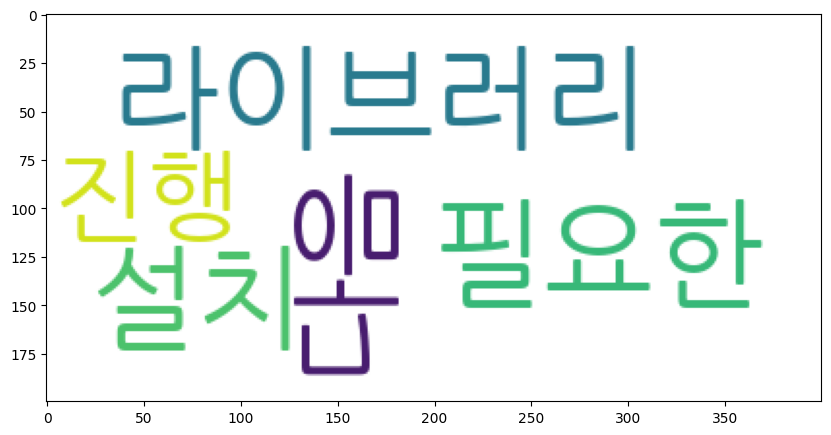

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.imshow(cloud)

# csv 활용

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import collections
from wordcloud import WordCloud

df = pd.read_table('/content/drive/MyDrive/AI스쿨 파일/ratings_train.txt')  # txt 파일은 read_table
df

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


In [ ]:
# 중복값, 결측치 확인(id 기준)
print(df['id'].nunique())
print(df.isnull().sum())

150000
id          0
document    5
label       0
dtype: int64


In [ ]:
# 결측치 제거
df = df.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(df.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [ ]:
# 불용어 -> 한글의 범주에 들어가지 않는 단어들
# 한글과 공백 제외 나머지 모두 불용어로 보고 제거
df['document'] = df['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")  # 모든 한글을 정규표현식으로 표현하면 저래됨

<ipython-input-53-59eccb70fc73>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['document'] = df['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")  # 모든 한글을 정규표현식으로 표현하면 저래됨
<ipython-input-53-59eccb70fc73>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['document'] = df['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")  # 모든 한글을 정규표현식으로 표현하면 저래됨


In [ ]:
from konlpy.tag import Okt
okt = Okt()

temp_list = []

for sentence in df['document']:
    s_list = okt.pos(sentence)
    for word, tag in s_list:
        if tag in ['Noun', 'Adjective']:
            temp_list.append(word)
counts = collections.Counter(temp_list)
tag = counts.most_common(50)
tag

KeyboardInterrupt: ignored

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(font_path='NanumGothic',background_color = 'skyblue', max_font_size=60)
cloud = wc.generate_from_frequencies(dict(tag))
cloud

In [ ]:
plt.figure(figsize=(10,8))
plt.imshow(cloud)

# 오후 진도
## 자연어 처리 실습(영화 리뷰 분석)

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/comment_rank.csv')
df.head()

,Unnamed: 0,movie,comment,rank
0,0,언포기버블,영화의 단조로운 스토리를 긴장감있,10
1,1,인질,납치범 대가리가 영화 다조지네;; 집중이안되네..,6
2,2,롱 리브 더 킹: 목포 영웅,NaN,10
3,3,싱크홀,싱크홀 별로라는 말이 많던데 그래도 제가 좋아하는 장르에 배우분들도 좋아하는 분들이...,10
4,4,아수라,찢었다...모든게 찢었다.,10


In [ ]:
# df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

# 중복 & 결측치 확인
df['movie'].nunique()
df.isnull().sum()

# 제거
df = df.dropna(how = 'any') # Null 값이 존재하는 행 제거
df.isnull().sum()

df

,Unnamed: 0,movie,comment,rank
0,0,언포기버블,영화의 단조로운 스토리를 긴장감있,10
1,1,인질,납치범 대가리가 영화 다조지네;; 집중이안되네..,6
3,3,싱크홀,싱크홀 별로라는 말이 많던데 그래도 제가 좋아하는 장르에 배우분들도 좋아하는 분들이...,10
4,4,아수라,찢었다...모든게 찢었다.,10
5,5,고양이 집사,방금 봤는데 너무 감동 깊게 봤습니다! 우리나라도 독일처럼 동물보호법 강화되서 더이...,10
...,...,...,...,...
984,984,언포기버블,영화의 단조로운 스토리를 긴장감있,10
985,985,인질,납치범 대가리가 영화 다조지네;; 집중이안되네..,10
987,987,싱크홀,싱크홀 별로라는 말이 많던데 그래도 제가 좋아하는 장르에 배우분들도 좋아하는 분들이...,8
988,988,아수라,찢었다...모든게 찢었다.,9


In [ ]:
data = df.groupby('movie').sum()
data

<ipython-input-3-d3449877bee4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = df.groupby('movie').sum()


,Unnamed: 0,rank
movie,,
고양이 집사,90777,1649
매트릭스,7560,80
미드소마,47530,780
비바리움,35549,764
서복,35273,438
싱크홀,48961,974
아수라,49060,952
어메이징 스파이더맨,13713,505
언포기버블,48664,746


In [ ]:
from konlpy.tag import Okt
import collections
from wordcloud import WordCloud
okt = Okt()

data = df[df.movie=='고양이 집사']
data['comment'] = data['comment'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

<ipython-input-4-46528ba25b36>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  data['comment'] = data['comment'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
<ipython-input-4-46528ba25b36>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['comment'] = data['comment'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [ ]:
temp_list = []

for sentence in data['comment']:
    s_list = okt.pos(sentence)
    for word, tag in s_list:
        if tag in ['Noun', 'Adjective']:
            temp_list.append(word)
counts = collections.Counter(temp_list)
tag = counts.most_common(10)
tag

[('아이', 198),
 ('감동', 190),
 ('사람', 190),
 ('방금', 99),
 ('깊게', 99),
 ('우리나라', 99),
 ('독일', 99),
 ('동물보호법', 99),
 ('강화', 99),
 ('더', 99)]

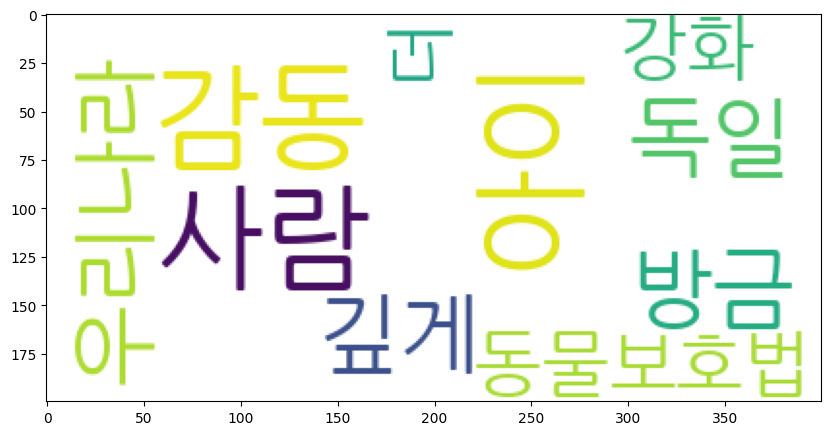

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(font_path='NanumGothic',background_color = 'white', max_font_size=60)
cloud = wc.generate_from_frequencies(dict(tag))

import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.imshow(cloud)